### Chest XRay Pneumonia - Project

The following is a (very simple) example of a README file that allows the user to re-run data pre-processing, training, validation and evaluation. Note that you will likely perform more extensive hyperparameter tuning and train more models. You should inform the user how this hyperparameter was performed and ideally provide code for them to reproduce this process. 

Download data (and move into project folder): https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

### Training & validation
* In order to write data before running training please set --write_data option to True (False by default). 
* During training, the validation accuracy will be evaluated in order to choose the optimal number of epochs to train models.
* A log file will be generated during training to record validation loss and accuracy for future reference. 

#### Train MLP

In [ ]:
!python main.py MLP --write_data True

In [ ]:
! python main.py MLP --write_data True

#### Train CNN

In [ ]:
! python main.py CNN

#### Lets take a look at the validation performance for MLPs

In [ ]:
import json
%matplotlib inline
from utils.plotting import plot_training


cnn_val_log = "logs/cnn/CNN_120420_041934.json"


with open(cnn_val_log, 'r') as cnn:
    cnn_val_json = json.load(cnn)
    

fig = plot_training(cnn_val_json["train_losses"],
                    cnn_val_json["train_accs"],
                    cnn_val_json["val_losses"], 
                    cnn_val_json["val_accs"],
                    model_name="CNN",
                    return_fig=True)

fig.savefig('figs/CNN_training_vis.png')

In [ ]:
! python eval.py logs/mlp/MLP_130320_184810.json 5

In [ ]:
! python eval.py logs/cnn/CNN_130320_193314.json 5

     model       roc auc
0      CNN  0.71± 0.0288
0  AlexNet  0.74± 0.0646
0      MLP  0.78± 0.0235
0  ResNext  0.75± 0.0112


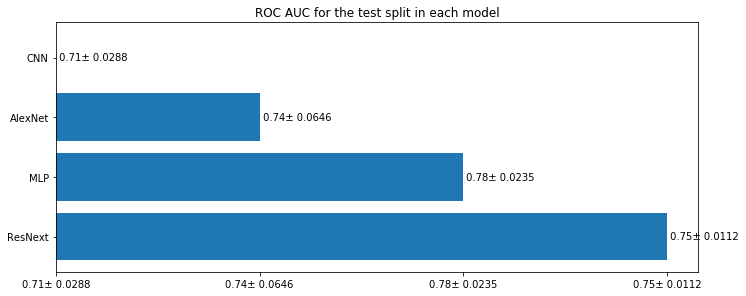

In [30]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

with open("logs/cnn/eval_logs/CNN_10.json") as f:
    cnn_log = json.load(f)
    
with open("logs/alexnet/eval_logs/AlexNet_10.json") as f:
    alx_log = json.load(f)
    
with open("logs/mlp/eval_logs/MLP_10.json") as f:
    mlp_log = json.load(f)
    
with open("logs/resnext/eval_logs/ResNext_10.json") as f:
    res_log = json.load(f)
    
results = pd.DataFrame({"model":["CNN"],
                    "roc auc":["{0:.2f}\u00B1 {1:.4f}".format(cnn_log["mean_roc_auc"], np.sqrt(cnn_log["var_roc_auc"]))]})

results = results.append( pd.DataFrame({"model":["AlexNet"],
                    "roc auc":["{0:.2f}\u00B1 {1:.4f}".format(alx_log["mean_roc_auc"], np.sqrt(alx_log["var_roc_auc"]))]}) )

results = results.append( pd.DataFrame({"model":["MLP"],
                    "roc auc":["{0:.2f}\u00B1 {1:.4f}".format(mlp_log["mean_roc_auc"], np.sqrt(mlp_log["var_roc_auc"]))]}) )

results = results.append( pd.DataFrame({"model":["ResNext"],
                    "roc auc":["{0:.2f}\u00B1 {1:.4f}".format(res_log["mean_roc_auc"], np.sqrt(res_log["var_roc_auc"]))]}) )

print(results)

_, ax = plt.subplots(figsize=(10,4), squeeze=True)
plt.barh(results["model"],results["roc auc"])
plt.tight_layout()
for i, v in enumerate(results["roc auc"]):
    ax.text(v, i, " "+str(v), va='center')
plt.gca().invert_yaxis()
ax.set_title('ROC AUC for the test split in each model')
plt.savefig("test_roc_auc.pdf")

In [ ]:
# Handy tool for converting results to LaTeX table. 
print(results_df.to_latex(index=False))  